# Acquisition


In [1]:
import bs4
from urllib.request import urlopen

In [2]:
url= "https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic"
data=urlopen(url)
data_html=data.read()
data.close()

In [3]:
from bs4 import BeautifulSoup as soup
data_soup=soup(data_html,'html.parser')

In [4]:
data_soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>2019–20 coronavirus pandemic - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XnCGzQpAIHwAA-GtIV8AAACR","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"2019–20_coronavirus_pandemic","wgTitle":"2019–20 coronavirus pandemic","wgCurRevisionId":945973436,"wgRevisionId":945973436,"wgArticleId":62750956,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Japanese-language script (ja

In [5]:
tables=data_soup.findAll('table',{'class':'wikitable'})
len(tables)

2

In [6]:
corona_table=tables[0]
corona_table

<table class="wikitable plainrowheaders sortable" style="text-align:right; font-size:85%; margin:0 0 0 1em;">
<tbody><tr>
<th colspan="6"><div class="covid-show-table"><a href="#covid19-container">[show all]</a></div><div class="plainlinks hlist navbar mini" style="float:left; text-align:left"><ul><li class="nv-view"><a href="/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data" title="Template:2019–20 coronavirus pandemic data"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:2019%E2%80%9320_coronavirus_pandemic_data" title="Template talk:2019–20 coronavirus pandemic data"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div><div style="font-size:114%;margin:0 4em"><span style="font-size:85%;"><span class="nowrap

In [7]:
headers=corona_table.findAll('th')
print(headers)

[<th colspan="6"><div class="covid-show-table"><a href="#covid19-container">[show all]</a></div><div class="plainlinks hlist navbar mini" style="float:left; text-align:left"><ul><li class="nv-view"><a href="/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data" title="Template:2019–20 coronavirus pandemic data"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:2019%E2%80%9320_coronavirus_pandemic_data" title="Template talk:2019–20 coronavirus pandemic data"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:2019%E2%80%9320_coronavirus_pandemic_data&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div><div style="font-size:114%;margin:0 4em"><span style="font-size:85%;"><span class="nowrap"><a class="mw-selflink selflink">2019–20 coronavirus pandemic</a> by <a href="/wiki/2019%E2%80%9320_coronavirus_pandemic

In [8]:
column_titles=[ct.text[:-1] for ct in headers][1:5]
row1=[ct.text[:-1] for ct in headers][11:]

In [9]:
column_titles

['Countries and territories[a]', 'Cases[b]', 'Deaths', 'Recov.[c]']

In [10]:
rows_data=corona_table.findAll('tr')[3:]
rows_data

[<tr>
 <th scope="row" style="padding:0px 2px 1px; width:1px; border-right:none;"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span>
 </th>
 <th scope="row" style="padding:0px 2px 0px 1px; border-left:none;"><a href="/wiki/2019%E2%80%9320_coronavirus_pandemic_in_mainland_China" title="2019–20 coronavirus pandemic in mainland China">China <small>(mainland)</small></a><sup class="reference" id="cite_ref-33"><a href="#cite_n

In [11]:
table_rows=[]
for row in rows_data[:-2]:
    current_row=[]
    row_data=row.findAll('td',{})[:-1]
    for idx,data in enumerate(row_data):
        current_row.append(data.text[:-1])
    table_rows.append(current_row)
    
len(table_rows)

148

In [12]:
row=[]
for idx,rows in enumerate(row1):
    if idx%2==0:
        row.append(rows)
    else:
        pass
    
    

In [13]:
len(row)

148

In [14]:
for i in range(0,148,1):
        table_rows[i]= [row[i]]+table_rows[i]

In [15]:
table_rows

[['China (mainland)[d]', '80,881', '3,226', '68,690'],
 ['Italy', '27,980', '2,158', '2,749'],
 ['Iran', '14,991', '853', '4,996'],
 ['Spain', '9,942', '342', '530'],
 ['South Korea', '8,320', '81', '1,401'],
 ['Germany', '7,272', '17', '67'],
 ['France[e]', '6,633', '148', '12'],
 ['United States[f]', '4,740', '93', '74'],
 ['Switzerland[g]', '2,353', '19', '4'],
 ['United Kingdom[h]', '1,543', '55', '52'],
 ['Netherlands (kingdom)[i][j]', '1,417', '24', '–'],
 ['Norway[k]', '1,347', '3', '1'],
 ['Austria', '1,132', '3', '8'],
 ['Sweden[l]', '1,121', '7', '1'],
 ['Belgium', '1,058', '10', '1'],
 ['Denmark[m]', '932', '1', '1'],
 ['Japan', '814', '24', '164'],
 ['Diamond Princess[n]', '712', '7', '458'],
 ['Malaysia', '553', '0', '42'],
 ['Canada', '441', '4', '11'],
 ['Qatar', '439', '0', '4'],
 ['Australia', '401', '5', '27'],
 ['Greece', '352', '4', '8'],
 ['Czech Republic', '344', '0', '3'],
 ['Portugal', '331', '1', '3'],
 ['Israel', '298', '0', '4'],
 ['Finland', '278', '0', '10'

In [18]:
filename="corona_worldwide.csv"
with open(filename,'w') as f:
    header_string=','.join(column_titles)
    header_string+='\n'
    f.write(header_string)
     
    for rowss in table_rows:
        row_string=""
        for w in rowss:
            w=w.replace(',',"")
            row_string+= w +','
        row_string+= '\n'
        f.write(row_string)
        

# Visualization

In [26]:
import pandas as pd

corona_data= pd.read_csv(r"C:\Users\anshu\corona_worldwide.csv")


In [35]:
corona_data

,Countries and territories[a],Cases[b],Deaths,Recov.[c]
0,China (mainland)[d],80881,3226,68690
1,Italy,27980,2158,2749
2,Iran,14991,853,4996
3,Spain,9942,342,530
4,South Korea,8320,81,1401
5,Germany,7272,17,67
6,France[e],6633,148,12
7,United States[f],4740,93,74
8,Switzerland[g],2353,19,4
9,United Kingdom[h],1543,55,52


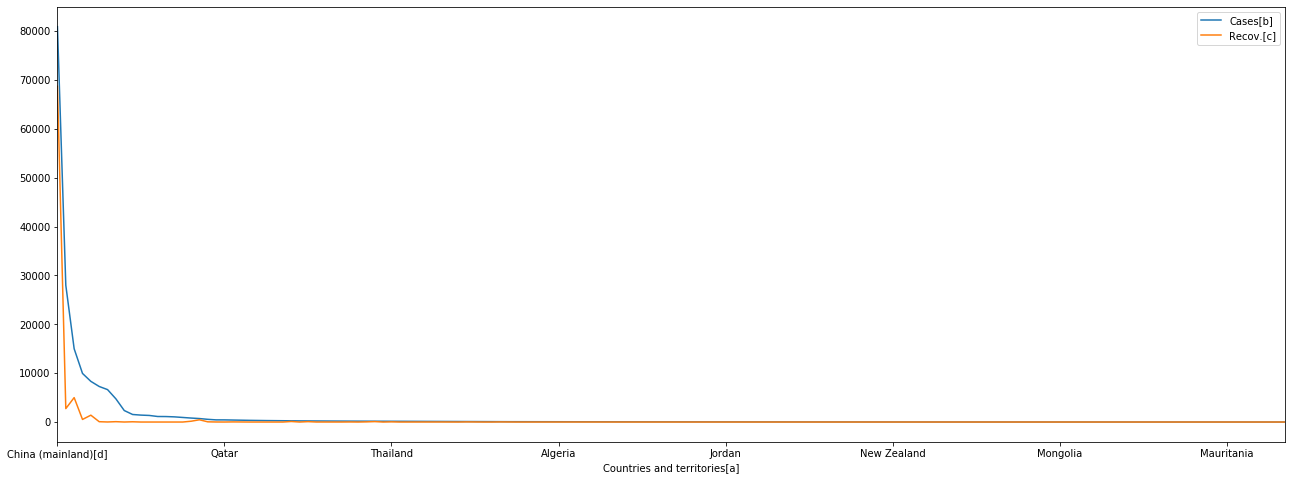

In [59]:
ax=corona_data.plot(x='Countries and territories[a]', y='Cases[b]',kind='line', figsize=(22,8))
corona_data.plot(x='Countries and territories[a]', y='Recov.[c]',ax=ax)

In [47]:
corona_data['deaths per case']= (corona_data['Deaths'].mean()) / (corona_data['Cases[b]']) 

In [48]:
corona_data['']= (corona_data['Recov.[c]'].mean()) / (corona_data['Cases[b]']) 

In [49]:
corona_data.head()

,Countries and territories[a],Cases[b],Deaths,Recov.[c],deaths per case,Recoveries per case
0,China (mainland)[d],80881,3226,68690,0.000599,0.006676
1,Italy,27980,2158,2749,0.001731,0.019299
2,Iran,14991,853,4996,0.003231,0.036020
3,Spain,9942,342,530,0.004872,0.054312
4,South Korea,8320,81,1401,0.005822,0.064901


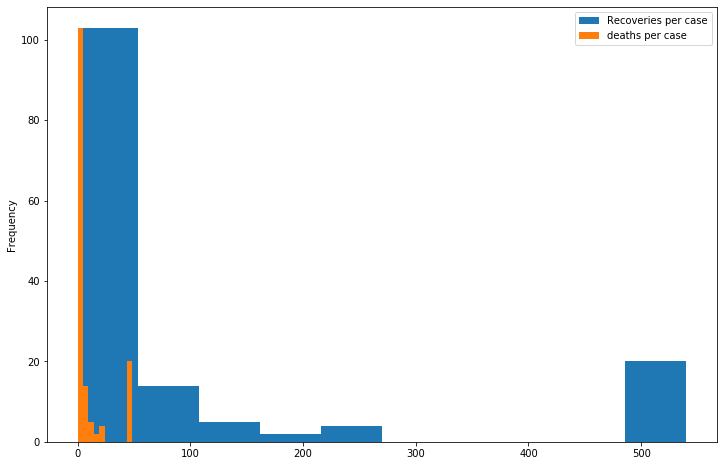

In [60]:
bx=corona_data.plot(x='Countries and territories[a]', y='Recoveries per case',kind='hist', figsize=(12,8))
corona_data.plot(x='Countries and territories[a]', y='deaths per case',kind='hist',ax=bx)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBB9D3B780>],
      dtype=object)

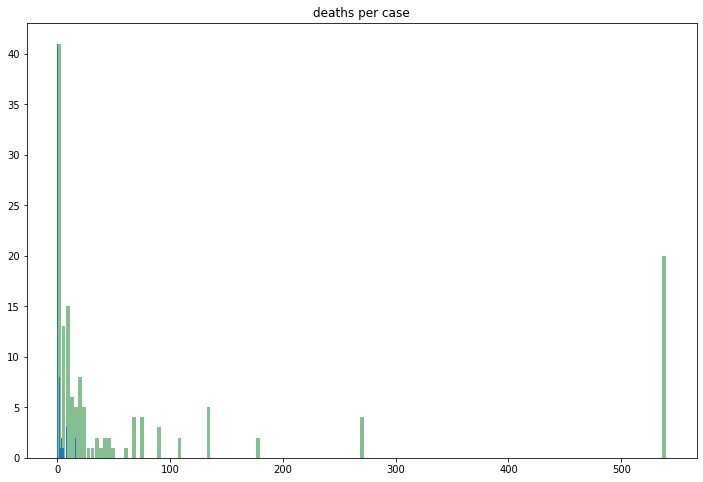

In [76]:
cx = corona_data.hist(column='Recoveries per case', bins=147, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
corona_data.hist(column='deaths per case', bins=147, grid=False, figsize=(12,8), zorder=2, rwidth=0.9,ax=cx)
